<a href="https://colab.research.google.com/github/Lucio-MR/Elasticidades/blob/main/Elasticidades_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos la paqueteria a usar
import pandas as pd
import numpy as np
from IPython.display import display
import datetime as dt
from google.colab import drive

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge

import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Leemos los datos
#data = pd.read_excel('/content/drive/MyDrive/Elasticidades/Data/dataset_FINAL_elasticidades_nido_kinder.xlsx')
data = pd.read_csv('/content/drive/MyDrive/Elasticidades/Data/CREMADORES.csv')

In [ ]:
#Primeros registros
display(data.head())

,MERCADO,PROD_TAG,DESCRIPCION,CATEGORIA,FABRICANTE,MARCA,SABOR,PRESENTACION,ENVASE,PesoConvertido,ITEM,SEM,MES,ANIO,VentasUnidades,VentasValor,VentasUnidadesEQ,DistribucionNumerica,DistribucionPonderada,PrecioPromedio,MESNUM,Name 2,Flag,Marca,Modelar
0,TOTAL AUTOS SCANNING MEXICO,P000000000000666416000000000000033782240,COFFEE MATE LIQ S/LAC AVELL TETRA750M+NESCAFE ...,CREMADORES,NESTLE,COFFEE MATE,AVELLANA,LIQUIDO,BOTE,750.0,7501058618474,SEMANA 01-19,ENERO,2019,1,18,1,0.0,0.0,17.940,1,Coffee Mate Liq Ave 500Ml,NaN,COFFEE MATE_LIQUIDO_BOTE_750,1
1,TOTAL AUTOS SCANNING MEXICO,P000000000000666416000000000000022621220,COFFEE MATE VAINILLA BOTE 210 GRS 7501059240650,CREMADORES,NESTLE,COFFEE MATE,VAINILLA,POLVO,BOTE,210.0,7501059240650,SEMANA 01-19,ENERO,2019,1,21,0,0.0,0.0,21.000,1,Coffee Mate 226G,NaN,COFFEE MATE_POLVO_BOTE_210,1
2,TOTAL AUTOS SCANNING MEXICO,P000000000000666416000000000000032563657,COFFEE MATE VAINILLA LATA 400GR NAL 7501058619280,CREMADORES,NESTLE,COFFEE MATE,VAINILLA,POLVO,LATA,400.0,7501058619280,SEMANA 01-19,ENERO,2019,1,22,0,0.0,0.0,22.240,1,Coffee Mate 435G,NaN,COFFEE MATE_POLVO_LATA_400,1
3,TOTAL AUTOS SCANNING MEXICO,P000000000000666416000000000000022637502,NESTLE COFFEE MATE SUST. BOTE PLAST CREMA 311 ...,CREMADORES,NESTLE,COFFEE MATE,ORIGINAL,POLVO,BOTE,311.0,50000131655,SEMANA 01-19,ENERO,2019,1,34,0,0.0,0.0,28.900,1,Coffee Mate 311G,NaN,COFFEE MATE_POLVO_BOTE_311,1
4,TOTAL AUTOS SCANNING MEXICO,P000000000000666416000000000000033822201,COFFEE MATE ORIGINAL POLVO BT640GRC/GNESCAFE C...,CREMADORES,NESTLE,COFFEE MATE,ORIGINAL,POLVO,BOTE,640.0,7501058624321,SEMANA 01-19,ENERO,2019,1,62,1,0.0,0.0,62.014,1,Coffee Mate 650G,NaN,COFFEE MATE_POLVO_BOTE_640,1


In [ ]:
#Dimensiones de la base
print("Numero de filas: ", str(data.shape[0]), "\nNumero de columnas: ", str(data.shape[1]) + "\n")

Numero de filas:  6044 
Numero de columnas:  25



In [ ]:
#Tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044 entries, 0 to 6043
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MERCADO                6044 non-null   object 
 1   PROD_TAG               6044 non-null   object 
 2   DESCRIPCION            6044 non-null   object 
 3   CATEGORIA              6044 non-null   object 
 4   FABRICANTE             6044 non-null   object 
 5   MARCA                  6044 non-null   object 
 6   SABOR                  5912 non-null   object 
 7   PRESENTACION           6044 non-null   object 
 8   ENVASE                 5912 non-null   object 
 9   PesoConvertido         5912 non-null   float64
 10  ITEM                   6044 non-null   int64  
 11  SEM                    6044 non-null   object 
 12  MES                    6044 non-null   object 
 13  ANIO                   6044 non-null   int64  
 14  VentasUnidades         6044 non-null   int64  
 15  Vent

In [ ]:
#Quitamos las columnas que no ocupamos
data.drop(['Flag'], axis = 1, inplace = True)
print("Numero de filas: ", str(data.shape[0]), "\nNumero de columnas: ", str(data.shape[1]) + "\n")

Numero de filas:  6044 
Numero de columnas:  24



,0
MERCADO,0
PROD_TAG,0
DESCRIPCION,0
CATEGORIA,0
FABRICANTE,0
MARCA,0
SABOR,132
PRESENTACION,0
ENVASE,132
PesoConvertido,132


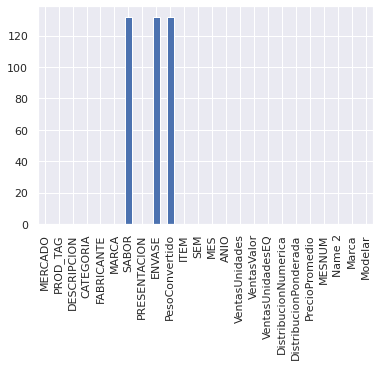

In [ ]:
#Buscamos el numero de faltantes (ya no hay faltantes)
display(pd.DataFrame(data.isnull().sum()))
data.isna().sum().plot(kind = 'bar')

In [ ]:
#Valores unicos por columna
display(pd.DataFrame(data.nunique()))

,0
MERCADO,1
PROD_TAG,98
DESCRIPCION,98
CATEGORIA,1
FABRICANTE,5
MARCA,5
SABOR,20
PRESENTACION,2
ENVASE,7
PesoConvertido,33


In [ ]:
#Duplicados todas las columnas
data.duplicated().sum()

0

In [ ]:
#Duplicados ciertas columnas
data[['PROD_TAG','DESCRIPCION','PRESENTACION','ENVASE','MARCA','ANIO','MES','SEM','Marca']].duplicated().sum()

0

In [ ]:
#Revisamos las ventas unidad, valor, unidades equivalentes por mes y año
dict_nombres_mes = dict(data[['MESNUM','MES']].drop_duplicates().to_dict(orient='split')['data'])
pd.options.display.float_format = '{:,}'.format
for ventas in ['VentasUnidades','VentasValor','VentasUnidadesEQ']:
    pt = pd.pivot_table(data, values = ventas, index = ['MESNUM'], columns = ['ANIO'], aggfunc = np.sum)
    pt.rename(index = dict_nombres_mes, inplace = True)
    print(ventas.upper())
    display(pd.DataFrame(pt))
    print('\n')

VENTASUNIDADES


ANIO,2019,2020,2021
MESNUM,,,
ENERO,"2,046,550.0","2,485,998.0","2,640,900.0"
FEBRERO,"1,700,295.0","2,362,919.0","2,514,225.0"
MARZO,"1,845,000.0","3,235,961.0","3,079,542.0"
ABRIL,"1,485,703.0","2,309,411.0","2,113,331.0"
MAYO,"1,448,429.0","2,243,034.0","2,101,046.0"
JUNIO,"2,034,629.0","2,656,713.0","2,718,270.0"
JULIO,"1,815,106.0","2,146,020.0","2,137,133.0"
AGOSTO,"1,754,239.0","2,134,120.0","2,075,449.0"
SEPTIEMBRE,"2,424,885.0","2,600,522.0","2,703,463.0"




VENTASVALOR


ANIO,2019,2020,2021
MESNUM,,,
ENERO,"66,072,795.0","84,471,435.0","98,276,872.0"
FEBRERO,"53,959,216.0","81,671,037.0","94,098,579.0"
MARZO,"57,573,737.0","113,065,613.0","117,741,435.0"
ABRIL,"46,220,118.0","79,170,612.0","78,921,762.0"
MAYO,"46,005,986.0","76,828,417.0","79,151,024.0"
JUNIO,"65,563,964.0","89,429,714.0","100,866,901.0"
JULIO,"57,625,408.0","70,574,997.0","78,222,183.0"
AGOSTO,"56,873,775.0","72,604,223.0","78,860,160.0"
SEPTIEMBRE,"75,860,131.0","91,471,218.0","105,359,509.0"




VENTASUNIDADESEQ


ANIO,2019,2020,2021
MESNUM,,,
ENERO,"791,876.0","1,037,367.0","1,167,565.0"
FEBRERO,"669,801.0","1,007,396.0","1,111,024.0"
MARZO,"735,003.0","1,413,200.0","1,401,350.0"
ABRIL,"595,358.0","998,439.0","956,008.0"
MAYO,"590,731.0","943,738.0","957,210.0"
JUNIO,"827,324.0","1,129,691.0","1,226,721.0"
JULIO,"727,476.0","909,069.0","969,337.0"
AGOSTO,"726,514.0","894,872.0","942,487.0"
SEPTIEMBRE,"959,036.0","1,102,244.0","1,220,521.0"


VENTASUNIDADES


ANIO,2019,2020,2021
FABRICANTE,,,
NESTLE,21052388,26671132,18978894
CONTROLLED LABEL,1810198,2657118,1984999
LAUTREC,976587,1177207,723667
CALKINS BURKE AND ZANN.DE MEX.,272398,359710,216334
BORDEN,198124,217884,179465


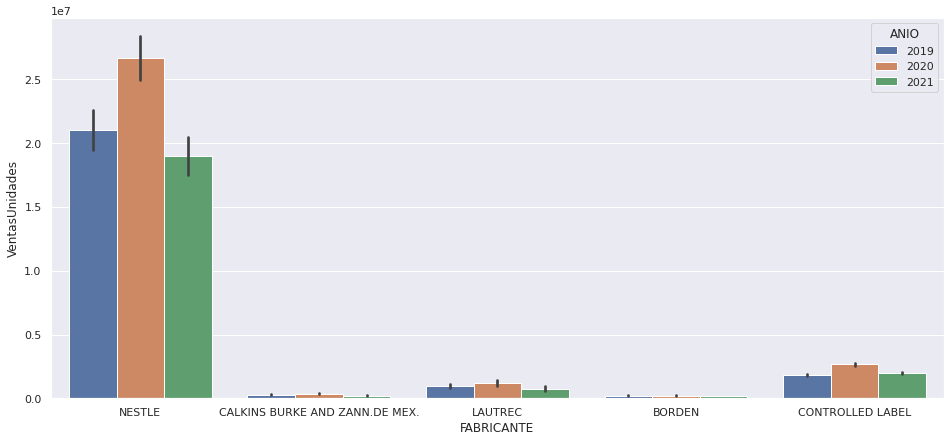



VENTASVALOR


ANIO,2019,2020,2021
FABRICANTE,,,
NESTLE,660587630,922076119,707192644
CONTROLLED LABEL,62410378,97149360,76493630
LAUTREC,27732921,29905272,19244287
CALKINS BURKE AND ZANN.DE MEX.,15113889,22746154,15328852
BORDEN,11305462,14653374,13239012


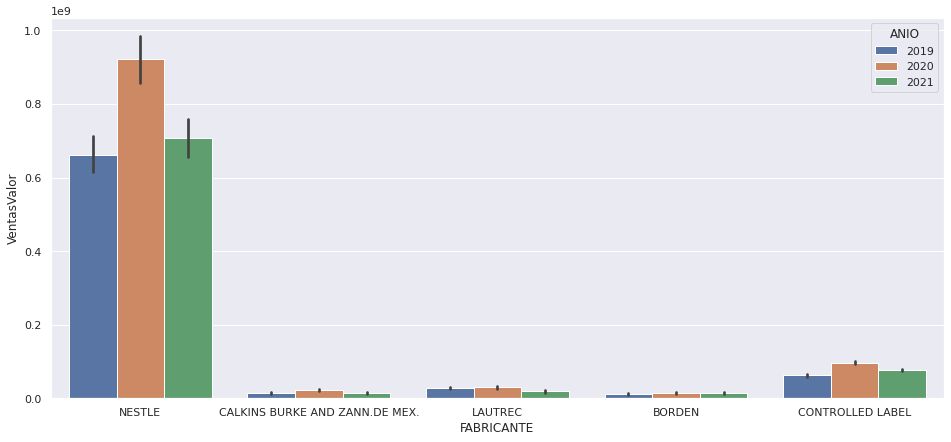



VENTASUNIDADESEQ


ANIO,2019,2020,2021
FABRICANTE,,,
NESTLE,8215882,11312953,8547242
CONTROLLED LABEL,792876,1151406,833591
LAUTREC,398786,420278,245598
CALKINS BURKE AND ZANN.DE MEX.,211935,305869,183182
BORDEN,118880,159926,142610


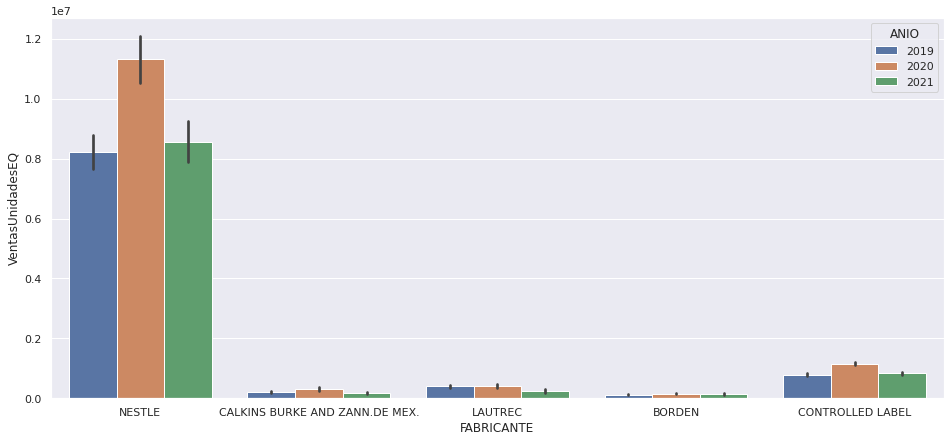

In [ ]:
#Revisamos las ventas unidad, valor, unidades equivalentes por fabricante y año
pd.options.display.float_format = '{:,}'.format
for ventas in ['VentasUnidades','VentasValor','VentasUnidadesEQ']:
    pt = pd.DataFrame(pd.pivot_table(data, values = ventas, index = ['FABRICANTE'], columns = ['ANIO'], aggfunc = np.sum)).sort_values(2021, ascending = False, na_position = 'last')
    print(ventas.upper())
    display(pt)
    fig, ax = plt.subplots(figsize=(16,7))
    sns.barplot(data = data, x = 'FABRICANTE', y=ventas, hue='ANIO', estimator = np.sum, ax = ax)
    plt.show()
    print('\n')

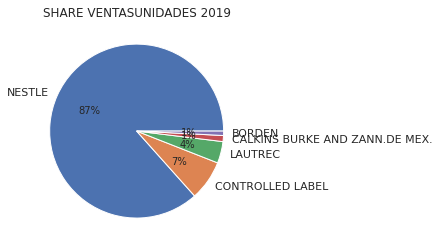

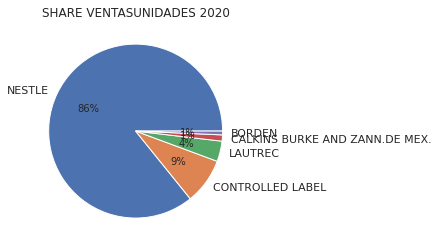

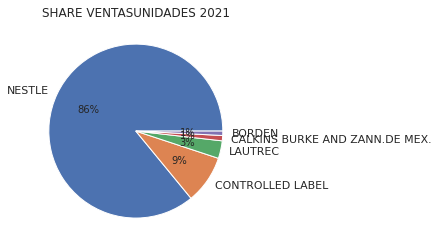

VENTASUNIDADES


ANIO,2019,2020,2021
FABRICANTE,,,
NESTLE,%86.60,%85.81,%85.94
CONTROLLED LABEL,%7.45,%8.55,%8.99
LAUTREC,%4.02,%3.79,%3.28
CALKINS BURKE AND ZANN.DE MEX.,%1.12,%1.16,%0.98
BORDEN,%0.81,%0.70,%0.81


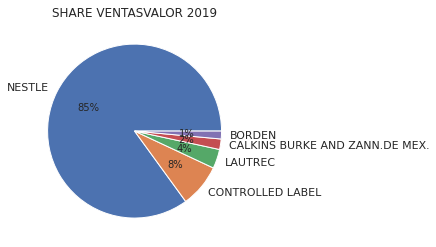

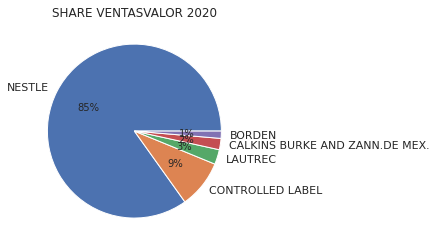

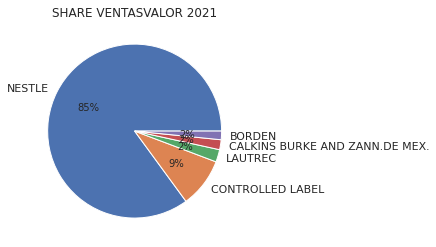

VENTASVALOR


ANIO,2019,2020,2021
FABRICANTE,,,
NESTLE,%85.00,%84.86,%85.05
CONTROLLED LABEL,%8.03,%8.94,%9.20
LAUTREC,%3.57,%2.75,%2.31
CALKINS BURKE AND ZANN.DE MEX.,%1.94,%2.09,%1.84
BORDEN,%1.45,%1.35,%1.59


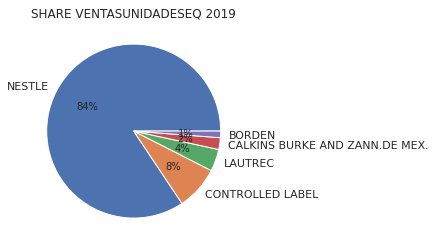

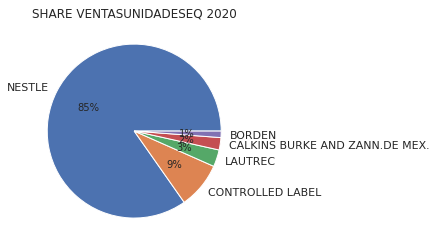

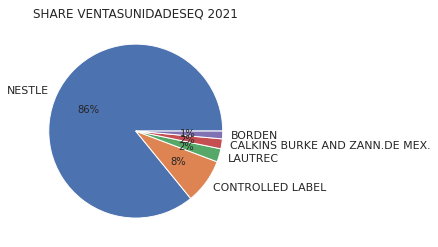

VENTASUNIDADESEQ


ANIO,2019,2020,2021
FABRICANTE,,,
NESTLE,%84.37,%84.74,%85.88
CONTROLLED LABEL,%8.14,%8.62,%8.38
LAUTREC,%4.10,%3.15,%2.47
CALKINS BURKE AND ZANN.DE MEX.,%2.18,%2.29,%1.84
BORDEN,%1.22,%1.20,%1.43


In [ ]:
#Revisamos el share anual de las ventas unidad, valor, unidades equivalentes por marca y año
pd.options.display.float_format = '%{:.2f}'.format
for ventas in ['VentasUnidades','VentasValor','VentasUnidadesEQ']:
    pt = pd.DataFrame(pd.pivot_table(data, values = ventas, index = ['FABRICANTE'], columns = ['ANIO'], aggfunc = np.sum)).sort_values(2021, ascending = False, na_position = 'last')
    pt_sum = pt.sum()
    for col in [2019,2020,2021]:
        pt[col] = (pt[col] / pt_sum[col]) * 100
        plt.pie(pt[col], labels = pt.index, autopct='%.0f%%')
        plt.title("SHARE " + ventas.upper() + ' ' + str(col))
        plt.show()
    print(ventas.upper())
    display(pd.DataFrame(pt))
    print('\n')

In [ ]:
#Revisamos el precio promedio anual y el precio promedio eq por FE
pd.options.display.float_format = '${:.2f}'.format
for ventas in ['VentasUnidades','VentasUnidadesEQ']:
    pt_unid = pd.DataFrame(pd.pivot_table(data, values = ventas, index = ['FABRICANTE'], columns = ['ANIO'], aggfunc = np.sum)).sort_values(2021, ascending = False, na_position = 'last')
    pt_valor = pd.DataFrame(pd.pivot_table(data, values = 'VentasValor', index = ['FABRICANTE'], columns = ['ANIO'], aggfunc = np.sum)).sort_values(2021, ascending = False, na_position = 'last')
    pt_valor = pt_valor.div(pt_unid, axis = 1, fill_value=0)
    #for col in [2018,2019,2020,2021]:
    #    pt[col] = (pt[col] / pt_sum[col]) * 100
    print(ventas.upper())
    display(pd.DataFrame(pt_valor))
    print('\n')

VENTASUNIDADES


ANIO,2019,2020,2021
FABRICANTE,,,
NESTLE,$31.38,$34.57,$37.26
CONTROLLED LABEL,$34.48,$36.56,$38.54
LAUTREC,$28.40,$25.40,$26.59
CALKINS BURKE AND ZANN.DE MEX.,$55.48,$63.23,$70.86
BORDEN,$57.06,$67.25,$73.77




VENTASUNIDADESEQ


ANIO,2019,2020,2021
FABRICANTE,,,
NESTLE,$80.40,$81.51,$82.74
CONTROLLED LABEL,$78.71,$84.37,$91.76
LAUTREC,$69.54,$71.16,$78.36
CALKINS BURKE AND ZANN.DE MEX.,$71.31,$74.37,$83.68
BORDEN,$95.10,$91.63,$92.83


In [ ]:
#Revisamos las ventas unidad, valor, unidades equivalentes por FE_new
pd.options.display.float_format = '{:,}'.format
for ventas in ['VentasUnidades','VentasValor','VentasUnidadesEQ']:
    pt = pd.pivot_table(data, values = ventas, index = ['Marca'], columns = ['ANIO'], aggfunc = np.sum).sort_values(2021, ascending = False, na_position = 'last')
    print(ventas.upper())
    display(pd.DataFrame(pt))
    print('\n')

VENTASUNIDADES


ANIO,2019,2020,2021
Marca,,,
COFFEE MATE_LIQUIDO_CARTON_530,"4,679,354.0","10,580,977.0","8,357,970.0"
COFFEE MATE_POLVO_BOTE_400,"3,757,635.0","4,578,820.0","3,150,361.0"
COFFEE MATE_POLVO_BOLSA_210,"2,204,820.0","2,753,563.0","2,047,623.0"
COFFEE MATE_POLVO_BOTE_160,"3,042,896.0","3,071,193.0","1,990,052.0"
CONTROLLED LABEL_CONTROLLED LABEL__,"1,810,198.0","2,657,118.0","1,984,999.0"
COFFEE MATE_LIQUIDO_BOTE_530,"568,622.0","1,404,724.0","1,158,306.0"
COFFEE MATE_POLVO_BOTE_640,"625,875.0","1,302,820.0","800,862.0"
LAUTREC_POLVO_BOLSA_300,"738,953.0","999,492.0","663,210.0"
COFFEE MATE_POLVO_LATA_900,nan,"390,089.0","628,299.0"




VENTASVALOR


ANIO,2019,2020,2021
Marca,,,
COFFEE MATE_LIQUIDO_CARTON_530,"115,709,389.0","274,667,699.0","230,319,990.0"
COFFEE MATE_POLVO_BOTE_400,"158,647,654.0","219,220,811.0","159,046,580.0"
CONTROLLED LABEL_CONTROLLED LABEL__,"62,410,378.0","97,149,360.0","76,493,630.0"
COFFEE MATE_POLVO_LATA_900,nan,"38,949,661.0","64,051,268.0"
COFFEE MATE_POLVO_BOTE_640,"43,626,323.0","94,634,295.0","61,952,078.0"
COFFEE MATE_POLVO_BOLSA_210,"63,611,502.0","82,924,091.0","55,346,786.0"
COFFEE MATE_POLVO_BOTE_160,"72,005,402.0","77,615,561.0","55,311,165.0"
COFFEE MATE_LIQUIDO_BOTE_530,"14,059,153.0","36,606,707.0","32,125,077.0"
COFFEE MATE_POLVO_LATA_1200,nan,nan,"24,649,891.0"




VENTASUNIDADESEQ


ANIO,2019,2020,2021
Marca,,,
COFFEE MATE_LIQUIDO_CARTON_530,"2,480,059.0","5,607,920.0","4,429,721.0"
COFFEE MATE_POLVO_BOTE_400,"1,503,046.0","1,831,526.0","1,260,147.0"
CONTROLLED LABEL_CONTROLLED LABEL__,"792,876.0","1,151,406.0","833,591.0"
COFFEE MATE_LIQUIDO_BOTE_530,"301,368.0","744,500.0","613,903.0"
COFFEE MATE_POLVO_LATA_900,nan,"351,080.0","565,470.0"
COFFEE MATE_POLVO_BOTE_640,"400,563.0","833,806.0","512,554.0"
COFFEE MATE_POLVO_BOLSA_210,"463,011.0","578,249.0","430,000.0"
COFFEE MATE_POLVO_BOTE_160,"486,868.0","491,391.0","318,407.0"
COFFEE MATE_POLVO_LATA_1200,nan,nan,"223,323.0"


In [ ]:
#Revisamos el share anual de las ventas unidad, valor, unidades equivalentes por FE
pd.options.display.float_format = '%{:.2f}'.format
for ventas in ['VentasUnidades','VentasValor','VentasUnidadesEQ']:
    pt = pd.DataFrame(pd.pivot_table(data, values = ventas, index = ['Marca'], columns = ['ANIO'], aggfunc = np.sum)).sort_values(2021, ascending = False, na_position = 'last')
    pt_sum = pt.sum()
    for col in [2019,2020,2021]:
        pt[col] = (pt[col] / pt_sum[col]) * 100
    print(ventas.upper())
    display(pd.DataFrame(pt))
    print('\n')

VENTASUNIDADES


ANIO,2019,2020,2021
Marca,,,
COFFEE MATE_LIQUIDO_CARTON_530,%19.25,%34.04,%37.85
COFFEE MATE_POLVO_BOTE_400,%15.46,%14.73,%14.27
COFFEE MATE_POLVO_BOLSA_210,%9.07,%8.86,%9.27
COFFEE MATE_POLVO_BOTE_160,%12.52,%9.88,%9.01
CONTROLLED LABEL_CONTROLLED LABEL__,%7.45,%8.55,%8.99
COFFEE MATE_LIQUIDO_BOTE_530,%2.34,%4.52,%5.25
COFFEE MATE_POLVO_BOTE_640,%2.57,%4.19,%3.63
LAUTREC_POLVO_BOLSA_300,%3.04,%3.22,%3.00
COFFEE MATE_POLVO_LATA_900,%nan,%1.25,%2.85




VENTASVALOR


ANIO,2019,2020,2021
Marca,,,
COFFEE MATE_LIQUIDO_CARTON_530,%14.89,%25.28,%27.70
COFFEE MATE_POLVO_BOTE_400,%20.41,%20.18,%19.13
CONTROLLED LABEL_CONTROLLED LABEL__,%8.03,%8.94,%9.20
COFFEE MATE_POLVO_LATA_900,%nan,%3.58,%7.70
COFFEE MATE_POLVO_BOTE_640,%5.61,%8.71,%7.45
COFFEE MATE_POLVO_BOLSA_210,%8.19,%7.63,%6.66
COFFEE MATE_POLVO_BOTE_160,%9.27,%7.14,%6.65
COFFEE MATE_LIQUIDO_BOTE_530,%1.81,%3.37,%3.86
COFFEE MATE_POLVO_LATA_1200,%nan,%nan,%2.96




VENTASUNIDADESEQ


ANIO,2019,2020,2021
Marca,,,
COFFEE MATE_LIQUIDO_CARTON_530,%25.47,%42.01,%44.51
COFFEE MATE_POLVO_BOTE_400,%15.43,%13.72,%12.66
CONTROLLED LABEL_CONTROLLED LABEL__,%8.14,%8.62,%8.38
COFFEE MATE_LIQUIDO_BOTE_530,%3.09,%5.58,%6.17
COFFEE MATE_POLVO_LATA_900,%nan,%2.63,%5.68
COFFEE MATE_POLVO_BOTE_640,%4.11,%6.25,%5.15
COFFEE MATE_POLVO_BOLSA_210,%4.75,%4.33,%4.32
COFFEE MATE_POLVO_BOTE_160,%5.00,%3.68,%3.20
COFFEE MATE_POLVO_LATA_1200,%nan,%nan,%2.24


In [ ]:
#Revisamos el precio promedio anual y el precio promedio eq por FE
pd.options.display.float_format = '${:.2f}'.format
for ventas in ['VentasUnidades','VentasUnidadesEQ']:
    pt_unid = pd.DataFrame(pd.pivot_table(data, values = ventas, index = ['Marca'], columns = ['ANIO'], aggfunc = np.sum)).sort_values(2021, ascending = False, na_position = 'last')
    pt_valor = pd.DataFrame(pd.pivot_table(data, values = 'VentasValor', index = ['Marca'], columns = ['ANIO'], aggfunc = np.sum)).sort_values(2021, ascending = False, na_position = 'last')
    pt_valor = pt_valor.div(pt_unid, axis = 1, fill_value = 0)
    #for col in [2018,2019,2020,2021]:
    #    pt[col] = (pt[col] / pt_sum[col]) * 100
    print(ventas.upper())
    display(pd.DataFrame(pt_valor))
    print('\n')

VENTASUNIDADES


ANIO,2019,2020,2021
Marca,,,
COFFEE MATE_LIQUIDO_BOTE_330,$12.34,$20.00,$20.00
COFFEE MATE_LIQUIDO_BOTE_473,$33.00,$28.33,$nan
COFFEE MATE_LIQUIDO_BOTE_500,$24.88,$17.53,$22.68
COFFEE MATE_LIQUIDO_BOTE_530,$24.72,$26.06,$27.73
COFFEE MATE_LIQUIDO_BOTE_750,$19.19,$19.67,$18.92
COFFEE MATE_LIQUIDO_CARTON_500,$22.29,$nan,$nan
COFFEE MATE_LIQUIDO_CARTON_530,$24.73,$25.96,$27.56
COFFEE MATE_POLVO_BOLSA_1000,$nan,$108.51,$101.49
COFFEE MATE_POLVO_BOLSA_210,$28.85,$30.12,$27.03




VENTASUNIDADESEQ


ANIO,2019,2020,2021
Marca,,,
COFFEE MATE_LIQUIDO_BOTE_330,$37.38,$inf,$inf
COFFEE MATE_LIQUIDO_BOTE_473,$165.00,$inf,$nan
COFFEE MATE_LIQUIDO_BOTE_500,$49.76,$31.62,$37.70
COFFEE MATE_LIQUIDO_BOTE_530,$46.65,$49.17,$52.33
COFFEE MATE_LIQUIDO_BOTE_750,$20.47,$19.67,$20.50
COFFEE MATE_LIQUIDO_CARTON_500,$44.56,$nan,$nan
COFFEE MATE_LIQUIDO_CARTON_530,$46.66,$48.98,$51.99
COFFEE MATE_POLVO_BOLSA_1000,$nan,$108.51,$101.49
COFFEE MATE_POLVO_BOLSA_210,$137.39,$143.41,$128.71


In [ ]:
#Revision
#pd.options.display.float_format = '{:.2f}'.format
#pt_nido_sistema21 = pd.DataFrame(pd.pivot_table(data[data['FE_new']=='Nido Sistema 2.1Kg'], values = ['unidades','valor','eq'], index = ['ANIO'], aggfunc = np.sum))
#pt_nido_sistema21['FC'] = pt_nido_sistema21['eq'] / pt_nido_sistema21['unidades']
#display(pt_nido_sistema21)

In [ ]:
#Quitamos FE que no se van a modelar
#data.drop(data[data.FE_new.isin(['Nido Sistema miel y Cereales 460G','Nido Sistema 2.1Kg'])].index, inplace = True)

In [ ]:
#Creamos una llave para el periodo
data['MESNUM2'] = ['0'+str(x) if x < 10 else str(x) for x in data['MESNUM']]
data['date_key'] = data['ANIO'].astype(str) + '-' + data['MESNUM2'].astype(str) + '-' + data['SEM'].astype(str)
data.drop(['MESNUM2'], axis = 1, inplace = True)

In [ ]:
data_VEQ = pd.pivot_table(data, values = ['VentasUnidadesEQ'], columns = ['date_key'], index = ['Marca'], aggfunc = np.sum)
data_Val = pd.pivot_table(data, values = ['VentasValor'], columns = ['date_key'], index = ['Marca'], aggfunc = np.sum)
data_VEQ.to_csv('PT_Ventas_EQ.csv')
data_Val.to_csv('PT_Ventas_Val.csv')

In [ ]:
#Manejo de NA's (Aparentemente se dejan de vender pero necesitamos la info)
#Tablas con las ventas por uni eq y valor por periodo y marca
VU_EQ = pd.DataFrame(pd.pivot_table(data, values = ['VentasUnidadesEQ'], index = ['date_key'], columns = ['Marca'], aggfunc = np.sum))#.reset_index()
VU_Val = pd.DataFrame(pd.pivot_table(data, values = ['VentasValor'], index = ['date_key'], columns = ['Marca'], aggfunc = np.sum))#.reset_index()

#Modificamos el nombre de las columnas
VU_EQ.columns = VU_EQ.columns.get_level_values(1)
VU_Val.columns = VU_Val.columns.get_level_values(1)

#Imputamos con el minimo
for col in VU_EQ.columns:
    if col != '':
      VU_EQ[[col]] = VU_EQ[[col]].fillna(value = VU_EQ[[col]].min())
      VU_Val[[col]] = VU_Val[[col]].fillna(value = VU_Val[[col]].min())

#Agrupamos los datos
VU_EQ = VU_EQ.stack().reset_index()
VU_EQ.columns = ['date_key','Marca','VentasUnidadesEQ']
VU_Val = VU_Val.stack().reset_index()
VU_Val.columns = ['date_key','Marca','VentasValor']

#Juntamos las bases
acum = VU_EQ.merge(VU_Val, on = ['date_key','Marca'])
acum['VentasUnidadesEQ'] = acum['VentasUnidadesEQ'].astype(int)
acum['VentasValor'] = acum['VentasValor'].astype(int)
acum.loc[acum['VentasUnidadesEQ'] == 0, 'VentasUnidadesEQ'] = 1
acum.loc[acum['VentasValor'] == 0, 'VentasValor'] = 1
acum['precio'] = acum['VentasValor'] / acum['VentasUnidadesEQ']
display(acum.head())
print(acum.shape)

,date_key,Marca,VentasUnidadesEQ,VentasValor,precio
0,2019-01-SEMANA 01-19,COFFEE MATE_LIQUIDO_BOTE_330,635,33539,$52.82
1,2019-01-SEMANA 01-19,COFFEE MATE_LIQUIDO_BOTE_473,1,17,$17.00
2,2019-01-SEMANA 01-19,COFFEE MATE_LIQUIDO_BOTE_500,88221,4451277,$50.46
3,2019-01-SEMANA 01-19,COFFEE MATE_LIQUIDO_BOTE_530,981,46254,$47.15
4,2019-01-SEMANA 01-19,COFFEE MATE_LIQUIDO_BOTE_750,1,18,$18.00


(6912, 5)


In [ ]:
#Quitamos los FE que no vamos a modelar
acum = acum[~acum['Marca'].isin(['COFFEE MATE_POLVO_DOY PACK_226','COFFEE MATE_POLVO_FRASCO_1000','COFFEE MATE_POLVO_BOLSA_250','COFFEE MATE_POLVO_BOTE_226',
                                 'COFFEE MATE_POLVO_BOTE_453','COFFEE MATE_POLVO_SOBRE_250','COFFEE MATE_POLVO_SOBRE_36','COFFEE MATE_POLVO_LATA_400',
                                 'COFFEE MATE_LIQUIDO_BOTE_473','COFFEE MATE_POLVO_BOTE_420','COFFEE MATE_POLVO_SOBRE_40','COFFEE MATE_POLVO_BOTE_520',
                                 'COFFEE MATE_POLVO_DOY PACK_227','COFFEE MATE_POLVO_DOY PACK_220','COFFEE MATE_POLVO_BOTE_170','COFFEE MATE_LIQUIDO_CARTON_500',
                                 'COFFEE MATE_POLVO_BOTE_210','COFFEE MATE_POLVO_LATA_1200','COFFEE MATE_POLVO_LATA_900'])]

In [ ]:
#Creamos una base para generar los modelos
pd.options.display.float_format = '{:,.1f}'.format
acum = pd.DataFrame(data.groupby(['Marca','date_key'])['VentasUnidadesEQ','VentasValor'].agg([np.sum])).reset_index().sort_values(['Marca','date_key'])
acum.columns = acum.columns.get_level_values(0)
acum.loc[acum['VentasUnidadesEQ'] == 0, 'VentasUnidadesEQ'] = 1
acum['precio'] = acum['VentasValor'] / acum['VentasUnidadesEQ']
display(acum.head())
print(acum.shape)
#Quitamos los FE que no vamos a modelar
#acum = acum[~acum['FE_new'].isin(['Nido Forti 1.56Kg','Nido Deslac 800G','Nido Forti 1.92Kg','Nido Forti 2.28 Kg','Nido Forti 360G','Nido Sistema 144G '])]

,Marca,date_key,VentasUnidadesEQ,VentasValor,precio
0,COFFEE MATE_LIQUIDO_BOTE_330,2019-01-SEMANA 01-19,635,33539,52.8
1,COFFEE MATE_LIQUIDO_BOTE_330,2019-01-SEMANA 02-19,719,30309,42.2
2,COFFEE MATE_LIQUIDO_BOTE_330,2019-01-SEMANA 03-19,674,25064,37.2
3,COFFEE MATE_LIQUIDO_BOTE_330,2019-01-SEMANA 04-19,517,16586,32.1
4,COFFEE MATE_LIQUIDO_BOTE_330,2019-02-SEMANA 05-19,413,9205,22.3


(3707, 5)


In [ ]:
#Regresiones lineales con intercepto por FE
resultados = {'FEs' : list(acum.Marca.unique()),
              'f_pvalue' : [],
              'r2' : [],
              'r2_adj' : [],
              'model_obj' : []}
betas = {}
for FE in resultados['FEs']:
    #Preparamos los datos a usar
    sub = acum[acum['Marca'] == FE]
    sub = sub[['date_key','VentasUnidadesEQ']]
    precios_pt = pd.pivot_table(acum[['date_key','Marca','precio']], values='precio', index=['date_key'],columns=['Marca'], aggfunc=np.sum)
    precios_pt.columns = precios_pt.columns.get_level_values(0)
    precios_pt.columns = ['PR_' + x for x in precios_pt.columns]
    sub = sub.merge(precios_pt, how = 'left', on = 'date_key', sort = True)
    aux = sub.drop(['date_key'], axis = 1).apply(np.log, axis = 0).copy()#dropna()
    aux['t'] = range(0, aux.shape[0])
    y = aux['VentasUnidadesEQ'].copy()
    X = aux.drop(['VentasUnidadesEQ'], axis = 1).copy()
    display(X)
    #Modelamos
    model = sm.OLS(y, sm.add_constant(X)).fit()
    #model = Ridge(alpha = .5).fit(X, y)
    betas[FE] = model.params.reset_index().rename(columns={'index':'type',0:'parameter'})
    #betas[FE] = model.get_params.reset_index().rename(columns={'index':'type',0:'parameter'})
    #Guardamos estadisticos
    resultados['f_pvalue'].append(model.f_pvalue)
    resultados['r2'].append(model.rsquared_adj)
    resultados['r2_adj'].append(model.rsquared)
    resultados['model_obj'].append(model)
    print('-'*100)
    print('Elasticidad ' + FE)
    print(model.summary())
    #Graficamos
    print('-'*100)

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_LIQUIDO_BOTE_330
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     15.23
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.05e-27
Time:                        00:06:28   Log-Likelihood:                -132.57
No. Observations:                 144   AIC:                             327.1
Df Residuals:                     113   BIC:                             419.2
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err        

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_LIQUIDO_BOTE_500
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     81.11
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.26e-63
Time:                        00:06:28   Log-Likelihood:                -179.00
No. Observations:                 144   AIC:                             420.0
Df Residuals:                     113   BIC:                             512.1
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err        

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_LIQUIDO_BOTE_530
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     221.4
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           7.19e-87
Time:                        00:06:28   Log-Likelihood:                 115.28
No. Observations:                 144   AIC:                            -168.6
Df Residuals:                     113   BIC:                            -76.49
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err        

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_LIQUIDO_BOTE_750
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     2.656
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           0.000111
Time:                        00:06:28   Log-Likelihood:                 101.95
No. Observations:                 144   AIC:                            -141.9
Df Residuals:                     113   BIC:                            -49.83
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err        

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_LIQUIDO_CARTON_530
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     200.7
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.64e-84
Time:                        00:06:28   Log-Likelihood:                 128.76
No. Observations:                 144   AIC:                            -195.5
Df Residuals:                     113   BIC:                            -103.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err      

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_BOLSA_1000
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     47.44
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           6.99e-51
Time:                        00:06:28   Log-Likelihood:                -151.97
No. Observations:                 144   AIC:                             365.9
Df Residuals:                     113   BIC:                             458.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err        

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_BOLSA_210
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     12.79
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.89e-24
Time:                        00:06:28   Log-Likelihood:                 72.282
No. Observations:                 144   AIC:                            -82.56
Df Residuals:                     113   BIC:                             9.500
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err         

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_BOLSA_260
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     16.04
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.22e-28
Time:                        00:06:29   Log-Likelihood:                -183.14
No. Observations:                 144   AIC:                             428.3
Df Residuals:                     113   BIC:                             520.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err         

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_BOLSA_950
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     149.5
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.81e-77
Time:                        00:06:29   Log-Likelihood:                -135.53
No. Observations:                 144   AIC:                             333.1
Df Residuals:                     113   BIC:                             425.1
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err         

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_BOTE_160
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     17.55
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.36e-30
Time:                        00:06:29   Log-Likelihood:                 136.61
No. Observations:                 144   AIC:                            -211.2
Df Residuals:                     113   BIC:                            -119.2
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_BOTE_311
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     236.6
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.81e-88
Time:                        00:06:29   Log-Likelihood:                 127.29
No. Observations:                 144   AIC:                            -192.6
Df Residuals:                     113   BIC:                            -100.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_BOTE_400
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     18.40
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           5.39e-31
Time:                        00:06:29   Log-Likelihood:                 67.848
No. Observations:                 144   AIC:                            -73.70
Df Residuals:                     113   BIC:                             18.37
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_BOTE_640
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     23.67
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           5.34e-36
Time:                        00:06:29   Log-Likelihood:                 58.946
No. Observations:                 144   AIC:                            -55.89
Df Residuals:                     113   BIC:                             36.17
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_BOTE_930
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     17.37
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           6.91e-30
Time:                        00:06:30   Log-Likelihood:                -64.485
No. Observations:                 144   AIC:                             191.0
Df Residuals:                     113   BIC:                             283.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_BOTE_950
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     285.8
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           5.08e-93
Time:                        00:06:30   Log-Likelihood:                -56.869
No. Observations:                 144   AIC:                             175.7
Df Residuals:                     113   BIC:                             267.8
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_DOY PACK_253
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     5.367
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.79e-11
Time:                        00:06:30   Log-Likelihood:                -17.905
No. Observations:                 144   AIC:                             97.81
Df Residuals:                     113   BIC:                             189.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err      

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_SOBRE_34
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     23.58
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           6.45e-36
Time:                        00:06:30   Log-Likelihood:                -106.48
No. Observations:                 144   AIC:                             275.0
Df Residuals:                     113   BIC:                             367.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad COFFEE MATE_POLVO_SOBRE_4
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     10.26
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.65e-20
Time:                        00:06:30   Log-Likelihood:                -21.475
No. Observations:                 144   AIC:                             105.0
Df Residuals:                     113   BIC:                             197.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad CONTROLLED LABEL_CONTROLLED LABEL__
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     16.29
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.14e-28
Time:                        00:06:30   Log-Likelihood:                 145.21
No. Observations:                 144   AIC:                            -228.4
Df Residuals:                     113   BIC:                            -136.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err 

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad CORINA_POLVO_BOLSA_1000
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     18.55
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.78e-31
Time:                        00:06:30   Log-Likelihood:                 38.477
No. Observations:                 144   AIC:                            -14.95
Df Residuals:                     113   BIC:                             77.11
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t  

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad CORINA_POLVO_BOTE_1000
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     18.50
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.23e-31
Time:                        00:06:31   Log-Likelihood:                 81.820
No. Observations:                 144   AIC:                            -101.6
Df Residuals:                     113   BIC:                            -9.575
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t   

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad CORINA_POLVO_BOTE_454
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     12.52
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           6.90e-24
Time:                        00:06:31   Log-Likelihood:                -144.74
No. Observations:                 144   AIC:                             351.5
Df Residuals:                     113   BIC:                             443.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t    

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad CORINA_POLVO_DOY PACK_227
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     7.231
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.55e-15
Time:                        00:06:31   Log-Likelihood:                 5.6221
No. Observations:                 144   AIC:                             50.76
Df Residuals:                     113   BIC:                             142.8
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad CREMORA_POLVO_BOTE_1000
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     9.517
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.66e-19
Time:                        00:06:31   Log-Likelihood:                -131.80
No. Observations:                 144   AIC:                             325.6
Df Residuals:                     113   BIC:                             417.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t  

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad CREMORA_POLVO_BOTE_170
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     14.27
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.18e-26
Time:                        00:06:31   Log-Likelihood:                -69.169
No. Observations:                 144   AIC:                             200.3
Df Residuals:                     113   BIC:                             292.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t   

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad LAUTREC_POLVO_BOLSA_300
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     15.20
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.22e-27
Time:                        00:06:31   Log-Likelihood:                 148.65
No. Observations:                 144   AIC:                            -235.3
Df Residuals:                     113   BIC:                            -143.2
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t  

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad LAUTREC_POLVO_BOTE_200
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     36.22
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           5.97e-45
Time:                        00:06:32   Log-Likelihood:                 21.965
No. Observations:                 144   AIC:                             18.07
Df Residuals:                     113   BIC:                             110.1
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t   

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad LAUTREC_POLVO_BOTE_460
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     46.88
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.28e-50
Time:                        00:06:32   Log-Likelihood:                 63.493
No. Observations:                 144   AIC:                            -64.99
Df Residuals:                     113   BIC:                             27.08
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t   

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,$3.97,$3.92,$3.85,$2.89,$3.85,$4.72,$4.82,$4.73,$4.63,$5.05,$4.77,$4.62,$4.66,$4.57,$2.94,$3.00,$5.05,$4.87,$4.38,$4.16,$4.30,$4.70,$4.62,$4.49,$4.76,$4.21,$4.68,$4.57,$4.13,0
1,$3.74,$3.90,$3.85,$2.89,$3.85,$4.72,$4.82,$4.69,$4.63,$5.05,$4.77,$4.61,$4.66,$4.57,$2.94,$3.00,$5.06,$4.86,$4.38,$4.17,$4.30,$4.72,$4.62,$4.49,$4.76,$4.21,$4.65,$4.55,$4.14,1
2,$3.62,$3.91,$3.85,$2.89,$3.85,$4.72,$4.90,$4.74,$4.63,$5.05,$4.76,$4.67,$4.66,$4.57,$2.94,$3.00,$5.07,$4.88,$4.38,$4.17,$4.29,$4.73,$4.62,$4.49,$4.76,$4.19,$4.66,$4.56,$4.12,2
3,$3.47,$3.93,$3.85,$2.89,$3.85,$4.72,$4.91,$4.72,$4.63,$5.05,$4.76,$4.68,$4.66,$4.57,$2.94,$3.00,$5.03,$4.91,$4.38,$4.08,$4.27,$4.74,$4.67,$4.49,$4.76,$4.25,$4.67,$4.57,$4.18,3
4,$3.10,$3.93,$3.85,$2.89,$3.85,$4.72,$4.90,$4.72,$4.63,$5.05,$4.75,$4.67,$4.66,$4.57,$2.94,$3.00,$5.04,$4.87,$4.38,$4.05,$4.24,$4.65,$4.65,$4.49,$4.76,$4.21,$4.66,$4.44,$4.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,$3.00,$3.72,$4.05,$2.89,$4.04,$4.46,$5.05,$4.89,$4.62,$5.19,$5.00,$4.87,$4.81,$4.57,$2.94,$3.00,$5.27,$5.03,$4.55,$4.44,$4.49,$4.69,$4.84,$4.53,$4.99,$4.28,$4.85,$4.72,$4.42,139
140,$3.00,$3.81,$4.00,$2.89,$3.99,$4.28,$5.03,$4.86,$4.63,$5.16,$5.01,$4.89,$4.79,$4.57,$2.94,$4.74,$5.26,$5.06,$4.54,$4.45,$4.49,$4.70,$4.83,$4.53,$4.99,$4.36,$4.81,$4.72,$4.33,140
141,$3.00,$3.00,$4.00,$2.89,$3.99,$4.02,$5.03,$4.81,$4.63,$5.15,$4.99,$4.90,$4.79,$4.57,$2.94,$4.60,$5.33,$5.04,$4.55,$4.46,$4.49,$4.56,$4.82,$4.53,$4.99,$4.38,$4.87,$4.69,$4.30,141
142,$3.00,$3.00,$4.00,$2.89,$3.99,$3.73,$5.01,$4.81,$4.63,$5.16,$4.99,$4.90,$4.77,$4.57,$2.94,$3.00,$5.33,$5.03,$4.54,$4.46,$4.49,$4.35,$4.83,$4.53,$4.99,$4.39,$4.96,$4.73,$4.30,142


----------------------------------------------------------------------------------------------------
Elasticidad LAUTREC_POLVO_LATA_1000
                            OLS Regression Results                            
Dep. Variable:       VentasUnidadesEQ   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     44.77
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.35e-49
Time:                        00:06:32   Log-Likelihood:                 67.084
No. Observations:                 144   AIC:                            -72.17
Df Residuals:                     113   BIC:                             19.90
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t  

In [ ]:
print(model)
print(type(model))

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


In [ ]:
#Cuadro resumen
pd.options.display.float_format = '{:,.4f}'.format
resume = pd.DataFrame.from_dict(resultados)
resume.to_csv('Resumen_Modelos.csv', index = False)
display(resume)

,FEs,f_pvalue,r2,r2_adj,model_obj
0,COFFEE MATE_LIQUIDO_BOTE_330,0.0000,0.7491,0.8017,<statsmodels.regression.linear_model.Regressio...
1,COFFEE MATE_LIQUIDO_BOTE_500,0.0000,0.9438,0.9556,<statsmodels.regression.linear_model.Regressio...
2,COFFEE MATE_LIQUIDO_BOTE_530,0.0000,0.9788,0.9833,<statsmodels.regression.linear_model.Regressio...
3,COFFEE MATE_LIQUIDO_BOTE_750,0.0001,0.2578,0.4135,<statsmodels.regression.linear_model.Regressio...
4,COFFEE MATE_LIQUIDO_CARTON_530,0.0000,0.9767,0.9816,<statsmodels.regression.linear_model.Regressio...
5,COFFEE MATE_POLVO_BOLSA_1000,0.0000,0.9069,0.9264,<statsmodels.regression.linear_model.Regressio...
6,COFFEE MATE_POLVO_BOLSA_210,0.0000,0.7122,0.7726,<statsmodels.regression.linear_model.Regressio...
7,COFFEE MATE_POLVO_BOLSA_260,0.0000,0.7594,0.8098,<statsmodels.regression.linear_model.Regressio...
8,COFFEE MATE_POLVO_BOLSA_950,0.0000,0.9689,0.9754,<statsmodels.regression.linear_model.Regressio...
9,COFFEE MATE_POLVO_BOTE_160,0.0000,0.7764,0.8233,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# Compilamos las betas en un DataFrame
betas_comp = pd.concat(betas).reset_index().drop('level_1', axis = 1).rename(columns={'level_0':'model'})
display(betas_comp)

,model,type,parameter
0,COFFEE MATE_LIQUIDO_BOTE_330,const,34.3242
1,COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_330,-0.3930
2,COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,-0.1151
3,COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_530,13.8415
4,COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_750,-0.4290
...,...,...,...
894,LAUTREC_POLVO_LATA_1000,PR_LAUTREC_POLVO_BOLSA_300,-0.3028
895,LAUTREC_POLVO_LATA_1000,PR_LAUTREC_POLVO_BOTE_200,0.6701
896,LAUTREC_POLVO_LATA_1000,PR_LAUTREC_POLVO_BOTE_460,-0.3967
897,LAUTREC_POLVO_LATA_1000,PR_LAUTREC_POLVO_LATA_1000,-2.7994


In [ ]:
# Pivotal con las betas por modelo y precio
elasticidades_cruzadas = pd.pivot_table(betas_comp, index = 'model', columns = 'type', values = 'parameter').copy()
elasticidades_cruzadas.drop(['const','t'], axis = 1, inplace = True)
elasticidades_cruzadas.to_csv('Elasticidades_Cruzadas.csv')
display(elasticidades_cruzadas)
print(elasticidades_cruzadas.columns)

type,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000
model,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
COFFEE MATE_LIQUIDO_BOTE_330,-0.3930,-0.1151,13.8415,-0.4290,-11.0644,0.9184,-2.6667,1.7464,-2.8029,6.0251,-7.5876,1.3514,-20.5337,-2.8629,-0.0625,0.0174,-0.1050,3.9146,3.1600,0.7996,3.2993,-0.1837,-0.3529,19.8259,-7.5904,-7.8888,1.9327,0.3896,1.6489
COFFEE MATE_LIQUIDO_BOTE_500,-0.1158,0.6962,3.7888,-0.2874,1.6982,-3.6511,-1.7298,-1.8446,-23.0387,18.0327,-1.3979,-5.6122,16.3177,4.0599,-0.8994,-0.0058,2.8747,1.2724,-3.9078,-1.0417,2.1554,-0.5620,4.4322,13.2039,-1.0548,0.2926,-1.5171,-0.9366,-0.9140
COFFEE MATE_LIQUIDO_BOTE_530,-0.1576,0.0258,-3.4670,0.1633,2.9341,0.3586,0.0830,0.2533,1.4331,-2.3952,1.9857,-0.0312,-0.7669,-0.2524,0.0058,0.0298,-0.1396,-0.2777,-0.2909,0.2534,-0.8304,0.0632,-0.5679,-8.2181,4.9258,-1.4728,1.0595,-0.2033,-0.8580
COFFEE MATE_LIQUIDO_BOTE_750,-0.0159,0.0193,-2.5149,1.1731,2.3611,0.1321,0.2496,0.1128,0.0538,1.0196,0.9890,-0.0291,-1.7158,-0.0437,-0.0426,0.0014,-0.1840,0.0949,0.3521,-0.0279,-0.4126,0.0300,0.0509,-0.4796,0.0752,-0.3458,0.0999,0.3459,-0.0348
COFFEE MATE_LIQUIDO_CARTON_530,-0.1288,0.0179,-1.7962,-0.0140,1.1351,0.3656,-0.0747,0.2696,1.1869,-2.7323,1.5904,0.1048,-0.3085,-0.4346,0.0213,0.0222,0.0018,-0.3094,0.1904,0.0484,-0.5299,0.0445,-1.0489,-6.2066,4.1032,-1.2831,0.8981,-0.2098,-0.7385
COFFEE MATE_POLVO_BOLSA_1000,0.0682,-0.6133,16.1445,0.3590,-17.3724,-1.9666,-1.5602,-0.4077,-5.6705,-1.5740,4.2853,-4.1508,5.0972,6.3108,0.1850,-0.5686,0.4585,-0.4041,5.2010,-5.3537,8.8117,-0.0343,4.0582,16.3960,-3.7675,2.8543,-3.3581,2.2138,8.0129
COFFEE MATE_POLVO_BOLSA_210,-0.0117,0.0336,1.8565,-0.3090,-2.0924,0.2358,-1.0303,0.4834,1.4524,-0.7102,-0.2839,0.3544,-4.5760,-1.4004,-0.1377,0.0201,-0.0933,0.2365,3.5200,0.7173,-0.1673,0.0109,-1.1633,-1.1809,1.4205,-3.8652,1.0241,0.6882,-0.4061
COFFEE MATE_POLVO_BOLSA_260,-0.4084,-0.0211,-11.3252,0.2158,18.0464,1.7534,-0.0686,-4.1381,-15.6362,16.1690,4.4255,-5.6384,3.5716,-2.1509,1.9451,0.1004,-0.9357,3.4896,-8.5906,-3.1228,-1.8585,-0.5731,12.1172,7.7936,-1.2624,20.2197,2.7555,-7.6154,-1.7171
COFFEE MATE_POLVO_BOLSA_950,-0.5135,-0.0628,-2.4490,-0.2594,-1.9387,-0.9642,1.8840,1.4516,12.1948,-12.8303,2.4853,2.3275,2.4593,8.5306,2.0574,-0.2030,-1.9433,-2.8681,6.2997,-0.0344,-2.4581,1.0906,1.4623,-2.2484,3.3018,-8.5119,1.2612,6.0856,-2.2237


Index(['PR_COFFEE MATE_LIQUIDO_BOTE_330', 'PR_COFFEE MATE_LIQUIDO_BOTE_500',
       'PR_COFFEE MATE_LIQUIDO_BOTE_530', 'PR_COFFEE MATE_LIQUIDO_BOTE_750',
       'PR_COFFEE MATE_LIQUIDO_CARTON_530', 'PR_COFFEE MATE_POLVO_BOLSA_1000',
       'PR_COFFEE MATE_POLVO_BOLSA_210', 'PR_COFFEE MATE_POLVO_BOLSA_260',
       'PR_COFFEE MATE_POLVO_BOLSA_950', 'PR_COFFEE MATE_POLVO_BOTE_160',
       'PR_COFFEE MATE_POLVO_BOTE_311', 'PR_COFFEE MATE_POLVO_BOTE_400',
       'PR_COFFEE MATE_POLVO_BOTE_640', 'PR_COFFEE MATE_POLVO_BOTE_930',
       'PR_COFFEE MATE_POLVO_BOTE_950', 'PR_COFFEE MATE_POLVO_DOY PACK_253',
       'PR_COFFEE MATE_POLVO_SOBRE_34', 'PR_COFFEE MATE_POLVO_SOBRE_4',
       'PR_CONTROLLED LABEL_CONTROLLED LABEL__', 'PR_CORINA_POLVO_BOLSA_1000',
       'PR_CORINA_POLVO_BOTE_1000', 'PR_CORINA_POLVO_BOTE_454',
       'PR_CORINA_POLVO_DOY PACK_227', 'PR_CREMORA_POLVO_BOTE_1000',
       'PR_CREMORA_POLVO_BOTE_170', 'PR_LAUTREC_POLVO_BOLSA_300',
       'PR_LAUTREC_POLVO_BOTE_200', 'PR_LAUTR

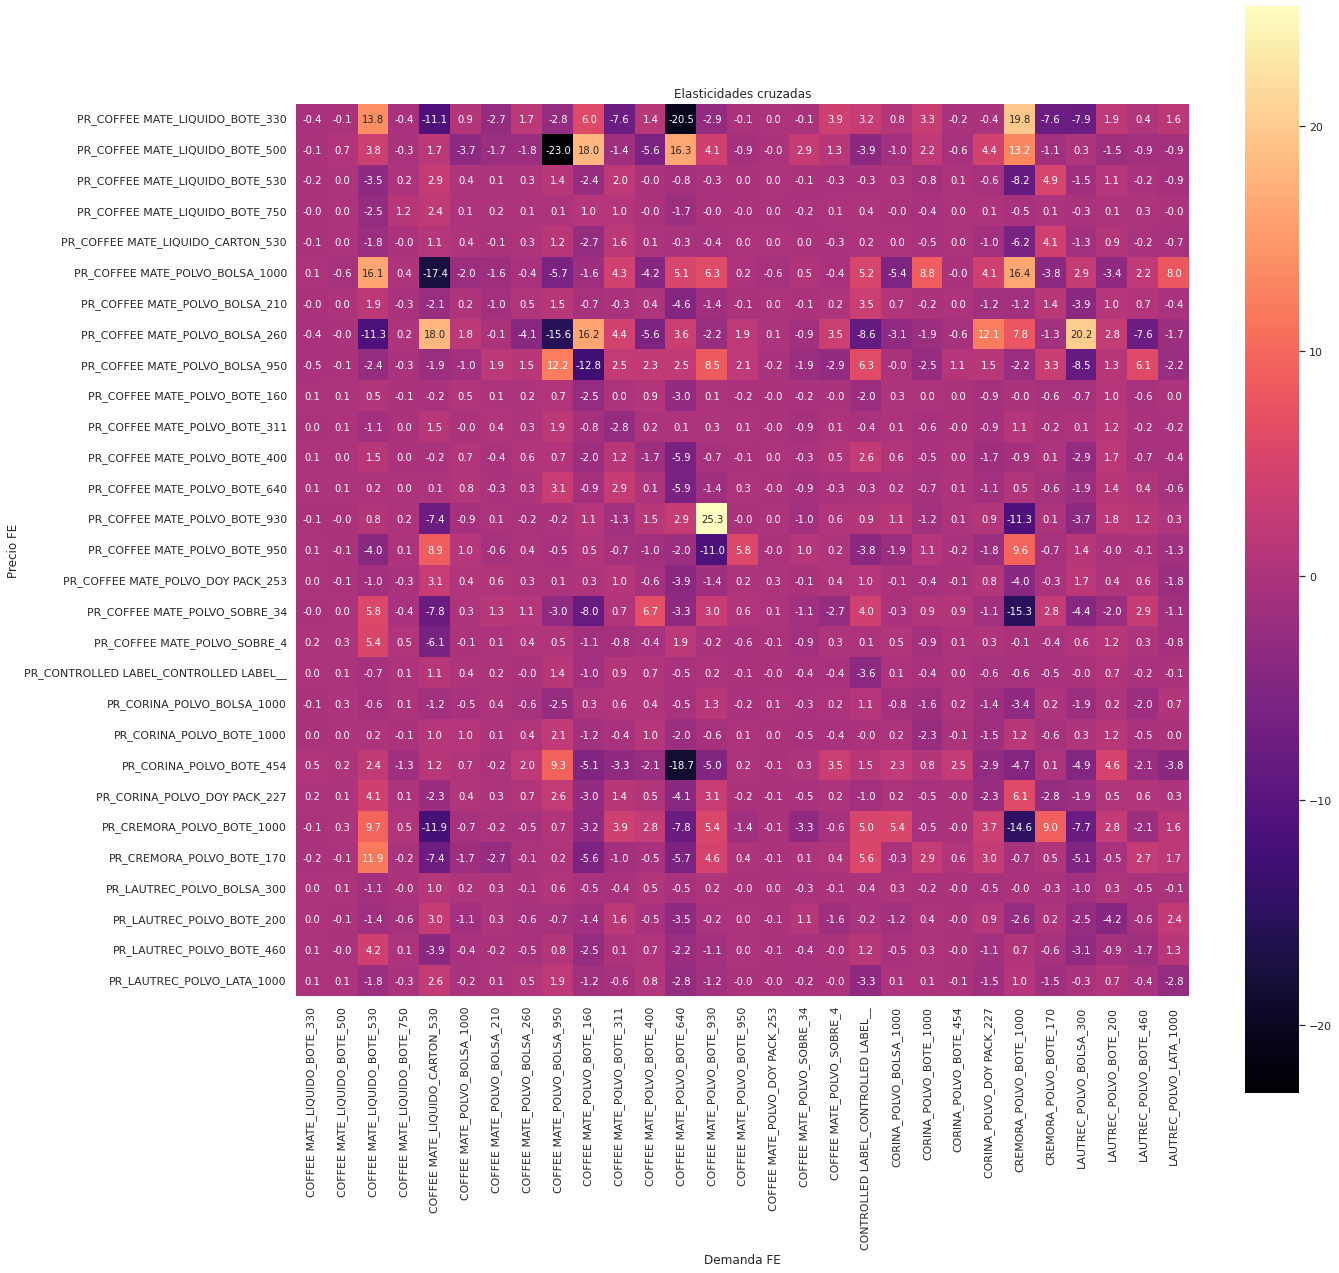

In [ ]:
#Graficamos las elasticidades cruzadas en un heatmap
fig, ax = plt.subplots(figsize=(20,20))
hm = sns.heatmap(data = elasticidades_cruzadas, yticklabels = elasticidades_cruzadas.columns, xticklabels = elasticidades_cruzadas.index, 
                 cmap = sns.color_palette("magma", as_cmap=True), annot = True, square = True, fmt = '.1f', ax = ax)
plt.title('Elasticidades cruzadas')
plt.xlabel("Demanda FE")
plt.ylabel("Precio FE")
plt.show()
fig = hm.get_figure()
fig.savefig('Elasticidades cruzadas.png')

In [ ]:
#Funcion que crea el X a predecir
def X_predecir(FE, var_ini = -50, var_fin = 50, var_tam = 5, intercepto = True):
  #Las variables 'var' son ´porcentajes y deben ser enteros
  #Generamos el ultimo registro del X de entrenamiento
  sub = acum[(acum['Marca'] == FE) & (acum['date_key'] == acum['date_key'].max())]
  sub = sub[['date_key','VentasUnidadesEQ']]
  aux = acum[['date_key','Marca','precio']]
  t_actual = len(acum['date_key'].unique())
  aux = acum[acum['date_key'] == acum['date_key'].max()]
  precios_pt = pd.pivot_table(aux[['date_key','Marca','precio']], values='precio', index=['date_key'],columns=['Marca'], aggfunc=np.sum)
  precios_pt.columns = precios_pt.columns.get_level_values(0)
  precios_pt.sort_index(inplace = True)
  precios_pt.columns = ['PR_' + x for x in precios_pt.columns]
  sub = sub.merge(precios_pt, how = 'left', on = 'date_key', sort = True)
  X = sub.drop(['VentasUnidadesEQ'], axis = 1).copy()
  #Generamos los factores disponibles
  list_var = list(range(var_ini, var_fin + var_tam, var_tam))
  pct_cambio = [1 - (x / 100) for x in list_var]
  pct_cambio.sort()
  #Armamos el DF en el que van a estar los casos a revisar
  X_acum = pd.DataFrame()
  for i in range(0, len(pct_cambio)):
    X_acum = X_acum.append(X, ignore_index = True)
  precio_inicial = X['PR_' + FE][0]
  X_acum['PR_' + FE] = [precio_inicial * x for x in pct_cambio]
  #Aplicamos logaritmos
  X_acum = X_acum.drop(['date_key'], axis = 1).apply(np.log, axis = 0).copy()
  X_acum['t'] = t_actual
  #Si es necesario agregar el intercepto
  if intercepto == True:
    X_acum = sm.add_constant(X_acum, has_constant = 'add')
  return X_acum, pct_cambio

In [ ]:
X_test, list_change = X_predecir('COFFEE MATE_LIQUIDO_BOTE_330', var_ini = -50, var_fin = 50, var_tam = 5)
display(X_test)

,PR_COFFEE MATE_LIQUIDO_BOTE_330,PR_COFFEE MATE_LIQUIDO_BOTE_500,PR_COFFEE MATE_LIQUIDO_BOTE_530,PR_COFFEE MATE_LIQUIDO_BOTE_750,PR_COFFEE MATE_LIQUIDO_CARTON_530,PR_COFFEE MATE_POLVO_BOLSA_1000,PR_COFFEE MATE_POLVO_BOLSA_210,PR_COFFEE MATE_POLVO_BOLSA_260,PR_COFFEE MATE_POLVO_BOLSA_950,PR_COFFEE MATE_POLVO_BOTE_160,PR_COFFEE MATE_POLVO_BOTE_311,PR_COFFEE MATE_POLVO_BOTE_400,PR_COFFEE MATE_POLVO_BOTE_640,PR_COFFEE MATE_POLVO_BOTE_930,PR_COFFEE MATE_POLVO_BOTE_950,PR_COFFEE MATE_POLVO_DOY PACK_253,PR_COFFEE MATE_POLVO_SOBRE_34,PR_COFFEE MATE_POLVO_SOBRE_4,PR_CONTROLLED LABEL_CONTROLLED LABEL__,PR_CORINA_POLVO_BOLSA_1000,PR_CORINA_POLVO_BOTE_1000,PR_CORINA_POLVO_BOTE_454,PR_CORINA_POLVO_DOY PACK_227,PR_CREMORA_POLVO_BOTE_1000,PR_CREMORA_POLVO_BOTE_170,PR_LAUTREC_POLVO_BOLSA_300,PR_LAUTREC_POLVO_BOTE_200,PR_LAUTREC_POLVO_BOTE_460,PR_LAUTREC_POLVO_LATA_1000,t
0,2.3026,3.7257,3.9938,2.8904,3.9900,3.9924,5.0153,4.8057,4.6151,5.1505,4.9937,4.9042,4.7697,4.5747,2.9444,4.6476,5.3407,5.0433,4.5449,4.4491,4.4927,4.3490,4.7958,4.5288,4.9894,4.3983,4.9848,4.7261,4.3208,144
1,2.3979,3.7257,3.9938,2.8904,3.9900,3.9924,5.0153,4.8057,4.6151,5.1505,4.9937,4.9042,4.7697,4.5747,2.9444,4.6476,5.3407,5.0433,4.5449,4.4491,4.4927,4.3490,4.7958,4.5288,4.9894,4.3983,4.9848,4.7261,4.3208,144
2,2.4849,3.7257,3.9938,2.8904,3.9900,3.9924,5.0153,4.8057,4.6151,5.1505,4.9937,4.9042,4.7697,4.5747,2.9444,4.6476,5.3407,5.0433,4.5449,4.4491,4.4927,4.3490,4.7958,4.5288,4.9894,4.3983,4.9848,4.7261,4.3208,144
3,2.5649,3.7257,3.9938,2.8904,3.9900,3.9924,5.0153,4.8057,4.6151,5.1505,4.9937,4.9042,4.7697,4.5747,2.9444,4.6476,5.3407,5.0433,4.5449,4.4491,4.4927,4.3490,4.7958,4.5288,4.9894,4.3983,4.9848,4.7261,4.3208,144
4,2.6391,3.7257,3.9938,2.8904,3.9900,3.9924,5.0153,4.8057,4.6151,5.1505,4.9937,4.9042,4.7697,4.5747,2.9444,4.6476,5.3407,5.0433,4.5449,4.4491,4.4927,4.3490,4.7958,4.5288,4.9894,4.3983,4.9848,4.7261,4.3208,144
5,2.7081,3.7257,3.9938,2.8904,3.9900,3.9924,5.0153,4.8057,4.6151,5.1505,4.9937,4.9042,4.7697,4.5747,2.9444,4.6476,5.3407,5.0433,4.5449,4.4491,4.4927,4.3490,4.7958,4.5288,4.9894,4.3983,4.9848,4.7261,4.3208,144
6,2.7726,3.7257,3.9938,2.8904,3.9900,3.9924,5.0153,4.8057,4.6151,5.1505,4.9937,4.9042,4.7697,4.5747,2.9444,4.6476,5.3407,5.0433,4.5449,4.4491,4.4927,4.3490,4.7958,4.5288,4.9894,4.3983,4.9848,4.7261,4.3208,144
7,2.8332,3.7257,3.9938,2.8904,3.9900,3.9924,5.0153,4.8057,4.6151,5.1505,4.9937,4.9042,4.7697,4.5747,2.9444,4.6476,5.3407,5.0433,4.5449,4.4491,4.4927,4.3490,4.7958,4.5288,4.9894,4.3983,4.9848,4.7261,4.3208,144
8,2.8904,3.7257,3.9938,2.8904,3.9900,3.9924,5.0153,4.8057,4.6151,5.1505,4.9937,4.9042,4.7697,4.5747,2.9444,4.6476,5.3407,5.0433,4.5449,4.4491,4.4927,4.3490,4.7958,4.5288,4.9894,4.3983,4.9848,4.7261,4.3208,144
9,2.9444,3.7257,3.9938,2.8904,3.9900,3.9924,5.0153,4.8057,4.6151,5.1505,4.9937,4.9042,4.7697,4.5747,2.9444,4.6476,5.3407,5.0433,4.5449,4.4491,4.4927,4.3490,4.7958,4.5288,4.9894,4.3983,4.9848,4.7261,4.3208,144


In [ ]:
#sns.scatterplot(data = acum[acum['FE_new'] =='Nido Sistema 460G'], x = 'precio', y = 'kilos')

In [ ]:
#Correlaciones
correlaciones = pd.pivot_table(acum, values = ['kilos','precio'], index = 'date', columns = 'FE_new')
correlaciones = correlaciones.corr(method='spearman')

correlaciones.drop([('kilos','ALPURA KIDS_REGULAR_1800'),
                   ('kilos','ALPURA KIDS_REGULAR_500'),
                   ('kilos','Nido Deslac 1.6Kg'),
                   ('kilos','Nido Deslac 460G'),
                   ('kilos','Nido Forti 120G'),
                   ('kilos','Nido Forti 480G'),
                   ('kilos','Nido Forti 720G'),
                   ('kilos','Nido Kinder  Deslac 1.5kg'),
                   ('kilos','Nido Kinder Deslac 360kg'),
                   ('kilos','Nido Kinder Deslac 800G'),
                   ('kilos','Nido Sistema 1.4Kg'),
                   ('kilos','Nido Sistema 360G'),
                   ('kilos','Nido Sistema 460G'),
                   ('kilos','Nido Sistema 800G')], axis = 1, inplace = True)

correlaciones.drop([('precio','ALPURA KIDS_REGULAR_1800'),
                   ('precio','ALPURA KIDS_REGULAR_500'),
                   ('precio','Nido Deslac 1.6Kg'),
                   ('precio','Nido Deslac 460G'),
                   ('precio','Nido Forti 120G'),
                   ('precio','Nido Forti 480G'),
                   ('precio','Nido Forti 720G'),
                   ('precio','Nido Kinder  Deslac 1.5kg'),
                   ('precio','Nido Kinder Deslac 360kg'),
                   ('precio','Nido Kinder Deslac 800G'),
                   ('precio','Nido Sistema 1.4Kg'),
                   ('precio','Nido Sistema 360G'),
                   ('precio','Nido Sistema 460G'),
                   ('precio','Nido Sistema 800G')], axis = 0, inplace = True)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data = correlaciones, yticklabels = correlaciones.columns.get_level_values(1), 
            xticklabels = correlaciones.index.get_level_values(1), annot = True, square = True, fmt = '.1f', ax = ax)
plt.title('Correlaciones')
plt.xlabel("Ventas kilo")
plt.ylabel("Precio")
plt.show()

KeyError: ignored

In [ ]:
#Correlaciones ventas por kilo
correlaciones = pd.pivot_table(acum, values = ['kilos'], index = 'date', columns = 'FE_new')
correlaciones = correlaciones.corr(method='spearman')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data = correlaciones, yticklabels = correlaciones.columns.get_level_values(1), 
            xticklabels = correlaciones.index.get_level_values(1), annot = True, square = True, fmt = '.1f', ax = ax)
plt.title('Correlaciones ventas kilo')
plt.xlabel("Ventas kilo FE")
plt.ylabel("Ventas kilo FE")
plt.show()

In [ ]:
# VIF Si hay mucha multicolinealidad en todo :(
dic_vif = {}
for FE in resultados['FEs']:
    #Preparamos los datos a usar
    sub = acum[acum['FE_new'] == FE]
    sub = sub[['date','kilos']]
    precios_pt = pd.pivot_table(acum[['date','FE_new','precio']], values='precio', index=['date'],columns=['FE_new'], aggfunc=np.sum)
    precios_pt.columns = precios_pt.columns.get_level_values(0)
    precios_pt.columns = ['PR_' + x for x in precios_pt.columns]
    sub = sub.merge(precios_pt, how = 'left', on = 'date')
    aux = sub.drop(['date'], axis = 1).apply(np.log, axis = 0).dropna().copy()
    aux['t'] = range(0, aux.shape[0])
    y = aux['kilos'].copy()
    X = aux.drop(['kilos'], axis = 1).copy()
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
    dic_vif[FE] = vif_data

In [ ]:
#Correlaciones ventas por precio
correlaciones = pd.pivot_table(acum, values = ['precio'], index = 'date', columns = 'FE_new')
correlaciones = correlaciones.corr(method='spearman')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data = correlaciones, yticklabels = correlaciones.columns.get_level_values(1), 
            xticklabels = correlaciones.index.get_level_values(1), annot = True, square = True, fmt = '.1f', ax = ax)
plt.title('Correlaciones ventas kilo')
plt.xlabel("Precio FE")
plt.ylabel("Precio FE")
plt.show()